## Merge the curated PubChem and Inclusive Datasets

In [171]:
import numpy as np
import pandas as pd

In [172]:
inclusiveDB = pd.read_csv("uaa_data/inclusive_db.csv", sep=";")
pubchemDB = pd.read_csv("uaa_data/ncaa_pubchem.csv")

In [173]:
inclusiveDB.columns

Index(['ID', 'ncAA abbreviation(s) used in the publication',
       'ncAA name, as mentioned in the publication', 'ncAA IUPAC name',
       'ncAA SMILES notation', 'ncAA chemical formula', 'ncAA Structure',
       'ncAA link for Pubchem, if available',
       'Application, if provided in the publication',
       'Canonical amino acid most similar to the ncAA',
       'aaRS ID (abbr. organism, abbr. natural substrate, RS, mutations if any)',
       'aaRS origin organism full name',
       'Amino acid sequence of (mutated) aaRS',
       'tRNA ID (abbr. organism, tRNA, natural AA transported, anticodon)',
       'tRNA organism', 'tRNA sequence', 'Codon suppression',
       'Tested in (protein)', 'Tested in (protein position)',
       'Tested in (organism/in vitro)', 'Comment (if applicable)',
       'Publication', 'DOI', 'Publication year'],
      dtype='object')

In [174]:
pubchemDB.columns

Index(['QueryName', 'CID', 'Name', 'MolecularFormula', 'MolecularWeight',
       'IUPACName', 'CanonicalSMILES', 'InChIKey', 'PubChemURL'],
      dtype='object')

In [175]:
merged_inclusive_pubchem = inclusiveDB.merge(
    pubchemDB,
    left_on='ncAA IUPAC name',
    right_on='IUPACName',
    how='left',
    indicator=True
)
merged_inclusive_pubchem.head()

,ID,ncAA abbreviation(s) used in the publication,"ncAA name, as mentioned in the publication",ncAA IUPAC name,ncAA SMILES notation,ncAA chemical formula,ncAA Structure,"ncAA link for Pubchem, if available","Application, if provided in the publication",Canonical amino acid most similar to the ncAA,...,QueryName,CID,Name,MolecularFormula,MolecularWeight,IUPACName,CanonicalSMILES,InChIKey,PubChemURL,_merge
0,1,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,O-Methyl-L-tyrosine,2723935.0,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,C10H13NO3,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,both
1,1,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,O-methyl-L-tyrosine,2723935.0,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,C10H13NO3,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,both
2,2,4fW,4-fluorotryptophan,2-amino-3-(4-fluoro-1H-indol-3-yl)propanoic acid,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C11H11FN2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/101198,not specified,Tryptophane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,3,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,p-Azido-L-phenylalanine,3080772.0,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C9H10N4O2,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,both
4,4,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,p-Azido-L-phenylalanine,3080772.0,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C9H10N4O2,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,both


In [176]:
merged_inclusive_pubchem['source'] = merged_inclusive_pubchem['_merge'].map({
    'both': 'PubChem',
    'left_only': 'Inclusive'
})
merged_inclusive_pubchem = merged_inclusive_pubchem.drop(columns=['_merge', 'source_x', 'source_y'], errors='ignore')

merged_inclusive_pubchem

,ID,ncAA abbreviation(s) used in the publication,"ncAA name, as mentioned in the publication",ncAA IUPAC name,ncAA SMILES notation,ncAA chemical formula,ncAA Structure,"ncAA link for Pubchem, if available","Application, if provided in the publication",Canonical amino acid most similar to the ncAA,...,QueryName,CID,Name,MolecularFormula,MolecularWeight,IUPACName,CanonicalSMILES,InChIKey,PubChemURL,source
0,1,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,O-Methyl-L-tyrosine,2723935.0,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,C10H13NO3,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem
1,1,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,O-methyl-L-tyrosine,2723935.0,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,C10H13NO3,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem
2,2,4fW,4-fluorotryptophan,2-amino-3-(4-fluoro-1H-indol-3-yl)propanoic acid,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C11H11FN2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/101198,not specified,Tryptophane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inclusive
3,3,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,p-Azido-L-phenylalanine,3080772.0,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C9H10N4O2,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem
4,4,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,p-Azido-L-phenylalanine,3080772.0,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C9H10N4O2,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2428,DHFW,"6,7-dihydrofuran-Trp","(2S)-2-amino-3-(7,8-dihydro-1H-furo[2,3-g]indo...",C1COC2=C1C3=C(C=C2)C(=CN3)CC(C(=O)O)N,C13H14N2O3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/1684...,manipulating cation−π Interactions,Tryptophan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inclusive
2734,2429,6MeOW,6-methoxy-Trp,(S)-2-Amino-3-(6-methoxy-1H-indol-3-yl)propano...,COC1=CC2=C(C=C1)C(=CN2)CC(C(=O)O)N,C12H14N2O3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/1540...,manipulating cation−π Interactions,Tryptophan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inclusive
2735,2430,DiMeW,"6,7-dimethyl-Trp","(2S)-2-amino-3-(6,7-dimethyl-1H-indol-3-yl)pro...",CC1=C(C2=C(C=C1)C(=CN2)CC(C(=O)O)N)C,C13H16N2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/9680...,manipulating cation−π Interactions,Tryptophan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inclusive
2736,2431,DiMeOW,"6,7-dimethoxy-Trp","(2S)-2-amino-3-(6,7-dimethoxy-1H-indol-3-yl)pr...",COC1=C(C2=C(C=C1)C(=CN2)CC(C(=O)O)N)OC,C13H16N2O4,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/1684...,manipulating cation−π Interactions,Tryptophan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inclusive


In [177]:
## How about with SwissSideChain?
import os
import pandas as pd

SSC_SMI_DIR = "/Users/sanjitrao/Downloads/L_SMI"


def fix_scc_smiles(s):
    s = s.replace("[NH3]", "[NH3+]")
    s = s.replace("[Cl](=O)=O", "ClS(=O)=O")  # example fix; adjust as needed
    return s

def load_ssc_smiles(smidir: str):
    rows = []
    for fname in os.listdir(smidir):
        if fname.endswith(".smi"):
            path = os.path.join(smidir, fname)
            with open(path, "r") as f:
                line = f.read().strip()

                if not line:
                    continue

                # typical format: "<smiles> <code>"
                parts = line.split()
                smiles = parts[0]
                code = parts[-1]  # 3-letter / extended code ("YCM", "WFP", etc.)

                rows.append((code, smiles))

    data =  pd.DataFrame(rows, columns=["ssc_code", "ssc_smiles"])
    data['ssc_code'] = data['ssc_code'].str.replace('.pdb', '', regex=False)


    data['ssc_smiles'] = data['ssc_smiles'].apply(fix_scc_smiles)
    return data


SSC = load_ssc_smiles(SSC_SMI_DIR)
SSC.head()


,ssc_code,ssc_smiles
0,ALN,O=[C](=O)[C@H](Cc1cccc2c1cccc2)[NH3+]
1,OCY,OCCSC[C@@H]([C](=O)=O)[NH3+]
2,0AF,[NH3+][C@H]([C](=O)=O)Cc1c[nH]c2c1cccc2O
3,26P,OC(=O)[C@H](CCC[C](=[C](=O)=O)=O)[NH3+]
4,BHD,O=[C](=O)[C@H]([C@@H]([C](=O)=O)[NH3+])O


In [178]:
SSC["source"] = "SwissSideChain"

merged_inclusive_pubchem_ssc = pd.concat([merged_inclusive_pubchem, SSC], ignore_index=True)


#merged_inclusive_pubchem_ssc = merged_inclusive_pubchem.merge(SSC, left_on = 'ncAA SMILES notation', right_on = 'ssc_smiles')
#merged_inclusive_pubchem_ssc
merged_inclusive_pubchem_ssc

,ID,ncAA abbreviation(s) used in the publication,"ncAA name, as mentioned in the publication",ncAA IUPAC name,ncAA SMILES notation,ncAA chemical formula,ncAA Structure,"ncAA link for Pubchem, if available","Application, if provided in the publication",Canonical amino acid most similar to the ncAA,...,Name,MolecularFormula,MolecularWeight,IUPACName,CanonicalSMILES,InChIKey,PubChemURL,source,ssc_code,ssc_smiles
0,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,C10H13NO3,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN
1,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,C10H13NO3,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN
2,2.0,4fW,4-fluorotryptophan,2-amino-3-(4-fluoro-1H-indol-3-yl)propanoic acid,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C11H11FN2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/101198,not specified,Tryptophane,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inclusive,NaN,NaN
3,3.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C9H10N4O2,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN
4,4.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C9H10N4O2,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SwissSideChain,MOT5,COc1ccc2c(c1)c(c[nH]2)C[C@@H](C(=O)O)[NH3+]
2964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SwissSideChain,PYR4,[NH3+][C@H](C(=O)O)Cc1ccncc1
2965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SwissSideChain,QX32,OC(=O)[C@H](Cc1cnc2c(n1)cccc2)[NH3+]
2966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SwissSideChain,ALC,[NH3+][C@H](C(=O)O)CC1CCCCC1


In [179]:
merged_inclusive_pubchem_ssc['source'].value_counts()

source
Inclusive         1877
PubChem            861
SwissSideChain     230
Name: count, dtype: int64

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = merged_inclusive_pubchem_ssc.copy()

# Pick SMILES column from the sources you actually have
def choose_smiles(row):
    for col in ["CanonicalSMILES", "ncAA SMILES notation", "ssc_smiles"]:
        if col in row and pd.notna(row[col]) and str(row[col]).strip() != "":
            return row[col]
    return None

df["smiles"] = df.apply(choose_smiles, axis=1)
df["smiles"] = df["smiles"].astype(str).str.strip()
df["key"] = df["smiles"]
df.head()


,ID,ncAA abbreviation(s) used in the publication,"ncAA name, as mentioned in the publication",ncAA IUPAC name,ncAA SMILES notation,ncAA chemical formula,ncAA Structure,"ncAA link for Pubchem, if available","Application, if provided in the publication",Canonical amino acid most similar to the ncAA,...,MolecularWeight,IUPACName,CanonicalSMILES,InChIKey,PubChemURL,source,ssc_code,ssc_smiles,smiles,key
0,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN,COC1=CC=C(C=C1)CC(C(=O)O)N,COC1=CC=C(C=C1)CC(C(=O)O)N
1,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,195.21,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN,COC1=CC=C(C=C1)CC(C(=O)O)N,COC1=CC=C(C=C1)CC(C(=O)O)N
2,2.0,4fW,4-fluorotryptophan,2-amino-3-(4-fluoro-1H-indol-3-yl)propanoic acid,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C11H11FN2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/101198,not specified,Tryptophane,...,NaN,NaN,NaN,NaN,NaN,Inclusive,NaN,NaN,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N
3,3.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-]
4,4.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,206.20,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-]


In [181]:
import re

def is_polymer(smiles):
    if smiles is None: 
        return False
    s = smiles.replace(" ", "").upper()
    # Count peptide bonds
    peptide_matches = len(re.findall("C\(=O\)N", s))
    return peptide_matches >= 2   # >=2 residues → polymer

df["type"] = df["smiles"].apply(
    lambda s: "biopolymer" if is_polymer(str(s)) else "monomer"
)
df.head()


,ID,ncAA abbreviation(s) used in the publication,"ncAA name, as mentioned in the publication",ncAA IUPAC name,ncAA SMILES notation,ncAA chemical formula,ncAA Structure,"ncAA link for Pubchem, if available","Application, if provided in the publication",Canonical amino acid most similar to the ncAA,...,IUPACName,CanonicalSMILES,InChIKey,PubChemURL,source,ssc_code,ssc_smiles,smiles,key,type
0,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN,COC1=CC=C(C=C1)CC(C(=O)O)N,COC1=CC=C(C=C1)CC(C(=O)O)N,monomer
1,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN,COC1=CC=C(C=C1)CC(C(=O)O)N,COC1=CC=C(C=C1)CC(C(=O)O)N,monomer
2,2.0,4fW,4-fluorotryptophan,2-amino-3-(4-fluoro-1H-indol-3-yl)propanoic acid,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C11H11FN2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/101198,not specified,Tryptophane,...,NaN,NaN,NaN,NaN,Inclusive,NaN,NaN,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,monomer
3,3.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],monomer
4,4.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],monomer


In [182]:
df['type'].value_counts()

type
monomer    2968
Name: count, dtype: int64

In [183]:
def source_assign(row):
    if "SwissSideChain" in str(row.get("source")):
        return "SwissSideChain"
    if "PubChem" in str(row.get("source")):
        return "PubChem"
    return "iNClusive"

df["source"] = df.apply(source_assign, axis=1)
df.head()

,ID,ncAA abbreviation(s) used in the publication,"ncAA name, as mentioned in the publication",ncAA IUPAC name,ncAA SMILES notation,ncAA chemical formula,ncAA Structure,"ncAA link for Pubchem, if available","Application, if provided in the publication",Canonical amino acid most similar to the ncAA,...,IUPACName,CanonicalSMILES,InChIKey,PubChemURL,source,ssc_code,ssc_smiles,smiles,key,type
0,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN,COC1=CC=C(C=C1)CC(C(=O)O)N,COC1=CC=C(C=C1)CC(C(=O)O)N,monomer
1,1.0,not available,O-methyl-l-tyrosine,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,COC1=CC=C(C=C1)CC(C(=O)O)N,C10H13NO3,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,not specified,Tyrosine,...,(2S)-2-amino-3-(4-methoxyphenyl)propanoic acid,NaN,GEYBMYRBIABFTA-VIFPVBQESA-N,https://pubchem.ncbi.nlm.nih.gov/compound/2723935,PubChem,NaN,NaN,COC1=CC=C(C=C1)CC(C(=O)O)N,COC1=CC=C(C=C1)CC(C(=O)O)N,monomer
2,2.0,4fW,4-fluorotryptophan,2-amino-3-(4-fluoro-1H-indol-3-yl)propanoic acid,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C11H11FN2O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/101198,not specified,Tryptophane,...,NaN,NaN,NaN,NaN,iNClusive,NaN,NaN,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,C1=CC2=C(C(=C1)F)C(=CN2)CC(C(=O)O)N,monomer
3,3.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],monomer
4,4.0,pAzPhe,p-azido-l-phenylalanine,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C9H10N4O2,NaN,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,crosslinking,Phenylalanine,...,(2S)-2-amino-3-(4-azidophenyl)propanoic acid,NaN,NEMHIKRLROONTL-QMMMGPOBSA-N,https://pubchem.ncbi.nlm.nih.gov/compound/3080772,PubChem,NaN,NaN,C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],C1=CC(=CC=C1CC(C(=O)O)N)N=[N+]=[N-],monomer


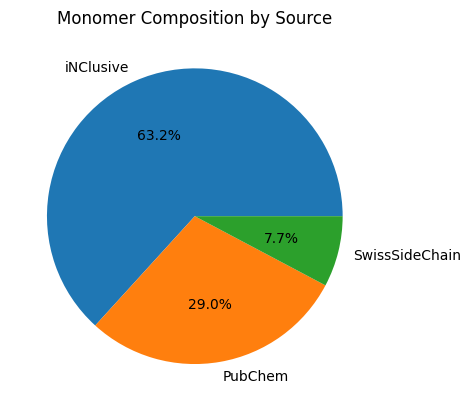

In [184]:
plt.figure()
df["source"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Monomer Composition by Source"
)
plt.ylabel("")
plt.show()


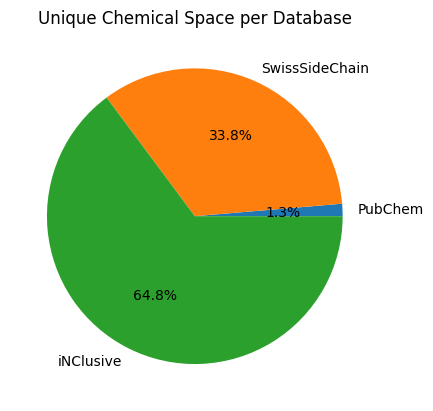

In [185]:
unique_counts = df.groupby("source")["key"].nunique()

plt.figure()
unique_counts.plot(
    kind="pie", autopct="%1.1f%%", title="Unique Chemical Space per Database"
)
plt.ylabel("")
plt.show()


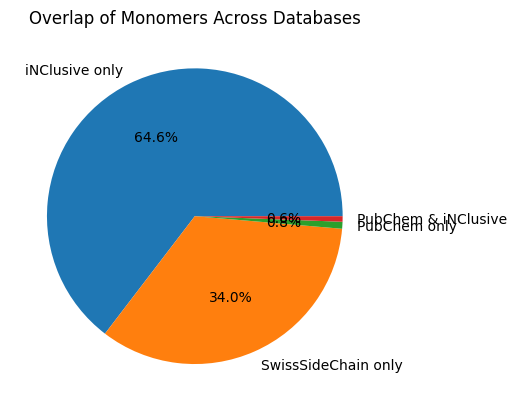

In [186]:
def overlap_label(sources):
    if len(sources)==1:
        return f"{sources[0]} only"
    elif len(sources)==2:
        return " & ".join(sorted(sources))
    else:
        return "All 3"

sets = (
    df.groupby("key")["source"]
    .apply(lambda x: tuple(sorted(x.unique())))
)

overlap = sets.map(overlap_label).value_counts()

plt.figure()
overlap.plot(
    kind="pie", autopct="%1.1f%%", title="Overlap of Monomers Across Databases"
)
plt.ylabel("")
plt.show()


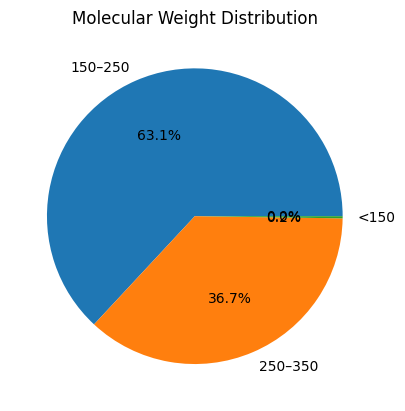

In [187]:
bins = [0, 150, 250, 350, np.inf]
labels = ["<150", "150–250", "250–350", ">350"]

df["MW_bin"] = pd.cut(df["MolecularWeight"], bins=bins, labels=labels)

plt.figure()
df["MW_bin"].value_counts().plot(
    kind="pie", autopct="%1.1f%%", title="Molecular Weight Distribution"
)
plt.ylabel("")
plt.show()


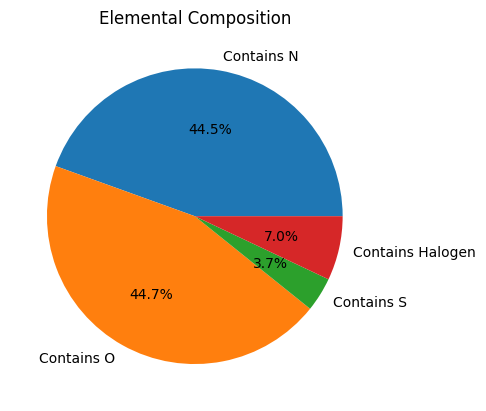

In [188]:
df["has_N"] = df["smiles"].str.contains("N")
df["has_O"] = df["smiles"].str.contains("O")
df["has_S"] = df["smiles"].str.contains("S")
df["has_halogen"] = df["smiles"].str.contains("F|Cl|Br|I")

elements = {
    "Contains N": df["has_N"].sum(),
    "Contains O": df["has_O"].sum(),
    "Contains S": df["has_S"].sum(),
    "Contains Halogen": df["has_halogen"].sum(),
}

plt.figure()
plt.pie(elements.values(), labels=elements.keys(), autopct="%1.1f%%")
plt.title("Elemental Composition")
plt.show()


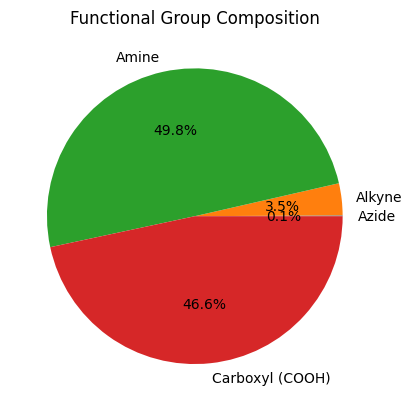

In [189]:
df["has_azide"] = df["smiles"].str.contains("N3")
df["has_alkyne"] = df["smiles"].str.contains("C#C")
df["has_amine"] = df["smiles"].str.contains("N")
df["has_carboxyl"] = df["smiles"].str.contains("C\(=O\)O")

functional = {
    "Azide": df["has_azide"].sum(),
    "Alkyne": df["has_alkyne"].sum(),
    "Amine": df["has_amine"].sum(),
    "Carboxyl (COOH)": df["has_carboxyl"].sum(),
}

plt.figure()
plt.pie(functional.values(), labels=functional.keys(), autopct="%1.1f%%")
plt.title("Functional Group Composition")
plt.show()
